<h2 style="text-align: center;"><strong>Week 2: Regression with Multiple Input Variables</strong></h2>

- Multiple Features
- Vectorization
- Gradient Descent for Multiple Linear Regression
- Normal Equation Method
- Feature Scaling
- Learning Rate $\alpha$
- Polynomial Regression
- Code Implementation of Multiple Linear Regression

---

## **Multiple Features**

In many real-world problems, a single feature is not sufficient to make accurate predictions. **Multiple features** are used when the output depends on more than one input variable. In linear regression, this leads to a model known as **multivariate linear regression**.

For example, predicting house prices may require multiple features such as size, number of bedrooms, number of floors, and age of the house.

### **Model with Multiple Features**

When using multiple features, the linear regression model is written as:

$$
h_{\mathbf{w}, b}(\mathbf{x}) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

Where:  
- $\mathbf{x} = (x_1, x_2, \dots, x_n)$ is the feature vector  
- $\mathbf{w} = (w_1, w_2, \dots, w_n)$ are the weights  
- $b$ is the bias (intercept)  
- $h_{\mathbf{w}, b}(\mathbf{x})$ is the predicted output  

Each feature has its own weight, allowing the model to learn how important each feature is for the prediction.

### **Vectorized Form**

To simplify notation and computation, the model can be written using vectors:

$$
h_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b
$$

This vectorized form is more efficient and is commonly used in implementations.

### **Example: House Price Prediction**

Suppose we use the following features to predict house prices:

| Feature | Description |
|-------|-------------|
| $x_1$ | Size (1000 sq.ft) |
| $x_2$ | Number of bedrooms |
| $x_3$ | Number of floors |
| $x_4$ | Age of the house (years) |

The prediction becomes:

$$
h(\mathbf{x}) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + b
$$

By training on data, the model learns appropriate values for each $w_i$ and $b$ that minimize the cost function.

### **Key Points**

- Multiple features improve model expressiveness  
- Each feature has an associated weight  
- Model is still linear in parameters  
- Vectorization simplifies computation and improves efficiency

---

## **Vectorization**

Vectorization is a technique that allows us to perform computations on **entire vectors and matrices at once**, instead of using explicit loops. It is a core concept in machine learning because it makes implementations **simpler, cleaner, and significantly faster**.

In the context of linear regression, vectorization allows us to compute predictions and gradients efficiently, especially when working with large datasets.

### **Manual Computation Using Summation**

In multivariate linear regression, the prediction function can be written using summation notation:

$$
h_{\mathbf{w}, b}(\mathbf{x}) = \sum_{j=1}^{n} w_j x_j + b
$$

This expands to:

$$
h(\mathbf{x}) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

This approach is easy to understand conceptually but becomes inefficient when the number of features $n$ is large.

### **Loop-Based Implementation (Slow Approach)**

Using a programming language, the above formula is often implemented with a loop:
```python
prediction = 0
for j in range(n):
    prediction += w[j] * x[j]
prediction += b
```

In this approach:

- Each multiplication and addition happens step by step
- Execution time increases as the number of features grows
- Performance becomes a bottleneck for large datasets

This is manageable for small problems but not scalable.

### **Vectorized Implementation (Fast Approach)**

Vectorization replaces explicit loops with a single vector operation:

$$
h_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b
$$

In code (using NumPy):
```python
prediction = np.dot(w, x) + b
```

This single line performs all multiplications and additions at once.

##### **What Happens Behind the Scenes**

Although it looks like one operation, vectorized computation:

- Uses optimized low-level libraries written in C and Fortran
- Takes advantage of CPU vector instructions (SIMD)
- Can run computations in parallel
- Minimizes Python-level overhead

Libraries such as NumPy, PyTorch, and TensorFlow use highly optimized linear algebra backends (e.g., BLAS, cuBLAS) to make these operations extremely fast.

### **Why Vectorization Is Much Faster**

| Loop-Based Approach | Vectorized Approach |
|---------------------|---------------------|
| Executes operations one at a time | Executes operations in parallel |
| High Python overhead | Low-level optimized code |
| Slow for large data | Scales efficiently |
| Harder to optimize | Automatically optimized |

**Real-world analogy:**
- Using a loop is like adding numbers one by one using a calculator.
- Vectorization is like giving all numbers to a high-speed machine that processes them simultaneously.

### **Impact on Gradient Descent**

**Without vectorization:**

- Gradient descent updates are slow
- Training becomes impractical for large datasets
- Code is harder to read and maintain

**With vectorization:**

- Gradients are computed efficiently for all examples at once
- Gradient descent runs significantly faster
- Enables training on large datasets

For example, the gradient with respect to $\mathbf{w}$ can be written as:

$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X}^\top (\mathbf{X}\mathbf{w} + b - \mathbf{y})
$$

This fully vectorized expression avoids loops and dramatically improves performance.

### **Real-World Importance**

Modern machine learning systems rely heavily on vectorization:

- Training models on millions of examples
- Running on GPUs and specialized hardware
- Powering deep learning frameworks

Without vectorization, many machine learning applications would be computationally infeasible.

### **Key Points**

- Vectorization replaces loops with matrix operations
- Uses optimized low-level implementations
- Enables parallel computation
- Makes gradient descent scalable and efficient
- Essential for real-world machine learning systems

---

## **Gradient Descent for Multiple Linear Regression**

When a model uses **multiple features**, gradient descent is used to efficiently find the values of all parameters that minimize the cost function. In **multiple linear regression**, gradient descent updates **each weight** associated with a feature, as well as the bias, at every iteration.

### **The Hypothesis Function**

For multiple features, the hypothesis is written as:

$$
h_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b
$$

Where:  
- $\mathbf{x} = (x_1, x_2, \dots, x_n)$ is the feature vector  
- $\mathbf{w} = (w_1, w_2, \dots, w_n)$ is the weight vector  
- $b$ is the bias  

### **The Cost Function**

The cost function remains the **mean squared error**, extended to multiple features:

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2
$$

The goal of gradient descent is to find $\mathbf{w}$ and $b$ that minimize this cost.

### **Gradient Descent Update Rules**

For each iteration, the parameters are updated as follows:

$$
w_j := w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j}
\quad \text{for } j = 1, 2, \dots, n
$$

$$
b := b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}
$$

Where $\alpha$ is the **learning rate**, which controls the step size of each update.

### **Vectorized Form of Gradient Descent**

Using vectorization, all weights are updated simultaneously:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{1}{m} X^\top (X\mathbf{w} + b - \mathbf{y})
$$

$$
b := b - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (h_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - y^{(i)})
$$

This vectorized form avoids explicit loops and makes gradient descent significantly faster and more efficient.

### **Why Gradient Descent Still Works with Multiple Features**

- Each parameter is updated independently based on its contribution to the error  
- Gradient descent scales well when vectorized  
- The cost function remains convex for linear regression, ensuring convergence to a global minimum  

### **Practical Considerations**

- **Feature scaling** is important when using multiple features  
- Poorly scaled features can slow down convergence  
- Choosing an appropriate learning rate $\alpha$ is critical  

### **Key Points**

- Gradient descent updates all weights and bias simultaneously  
- Vectorization makes updates efficient and scalable  
- Feature scaling improves convergence speed  
- Essential for training multivariate linear regression models

---

## **Normal Equation Method**

The **Normal Equation Method** is an alternative approach to **gradient descent** for finding the optimal values of the parameters $\mathbf{w}$ and $b$ in **linear regression**. Instead of using an iterative optimization process, this method computes the parameters **directly using a closed-form solution**.

This method can be applied **only to linear regression** models and is mainly useful for understanding the theory rather than for everyday practical use.

### **Idea Behind the Normal Equation**

Rather than minimizing the cost function step by step, the normal equation finds the parameter values that minimize the cost **in a single computation** by solving a system of linear equations.

For linear regression, the optimal parameters satisfy:

$$
\mathbf{w} = (X^\top X)^{-1} X^\top \mathbf{y}
$$

Where:  
- $X$ is the design matrix containing all training examples  
- $\mathbf{y}$ is the vector of target values  
- $X^\top$ is the transpose of $X$  
- $(X^\top X)^{-1}$ is the matrix inverse  

The bias term $b$ is typically included in $X$ by adding a column of ones.

### **Key Characteristics**

- No learning rate is required  
- No iterations are needed  
- Directly computes the optimal parameters  

### **Why It Is Not Used in Practice**

Although the normal equation is mathematically elegant, it has important limitations:

- Computing the matrix inverse is **computationally expensive**  
- Time complexity grows rapidly as the number of features increases  
- Does not scale well to large datasets  
- Not applicable to most non-linear or complex models  

For large feature sets, computing $(X^\top X)^{-1}$ becomes impractical.

### **Comparison with Gradient Descent**

| Gradient Descent | Normal Equation |
|-----------------|----------------|
| Iterative method | Direct solution |
| Requires learning rate | No learning rate |
| Scales to large datasets | Poor scalability |
| Used in practice | Rarely used |

### **Practical Use Case**

The normal equation is useful when:
- The number of features is small  
- The dataset easily fits in memory  
- A quick analytical solution is desired  

However, in real-world machine learning systems, **gradient descent and its variants** are preferred.

### **Key Points**

- Provides a closed-form solution for linear regression  
- Works only for linear regression  
- Computationally expensive for large feature sets  
- Rarely used in production systems  
- Important for conceptual understanding

---

## **Feature Scaling**

Feature scaling is a preprocessing technique used to **significantly speed up gradient descent** when working with multiple features. It ensures that all input features are on a **similar numerical scale**, so that no single feature dominates the learning process.

In real-world datasets, features often come from different sources and have different units. If these differences are not addressed, gradient descent becomes inefficient and slow.

Without feature scaling, gradient descent may converge very slowly or struggle to reach the minimum efficiently.

### **Why Feature Scaling Is Needed**

Consider a real-world house price prediction problem with features such as:

- House size: 50–2000 (square feet)  
- Number of bedrooms: 1–5  

Because house size has a much larger range than the number of bedrooms, gradient descent updates the parameters unevenly. The cost function contours become **elongated**, causing gradient descent to zig-zag and take many small steps before reaching the minimum.

Feature scaling reshapes the cost function into a more **circular shape**, allowing gradient descent to move **directly and efficiently** toward the global minimum.

### **Mean Normalization**

**Mean normalization** shifts feature values so that they are centered around zero and lie within a similar range.

The formula is:

$$
x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\max(x_j) - \min(x_j)}
$$

Where:  
- $x_j^{(i)}$ is the original value of feature $j$ for example $i$  
- $\mu_j$ is the mean of feature $j$  
- $\max(x_j)$ and $\min(x_j)$ are the maximum and minimum values of the feature  

After mean normalization:
- Feature values are centered around **0**
- Different features fall into comparable ranges

This allows gradient descent to update all parameters at a similar rate.

### **Min–Max Scaling**

**Min–Max Scaling** rescales features to a fixed range, typically **[0, 1]**.

The formula is:

$$
x_j^{(i)} = \frac{x_j^{(i)} - \min(x_j)}{\max(x_j) - \min(x_j)}
$$

After Min–Max Scaling:
- The smallest value becomes 0  
- The largest value becomes 1  
- All values lie between 0 and 1  

**Real-world intuition:**  
Min–Max Scaling is useful when you want to compare quantities on a common scale, such as converting exam scores from different grading systems into percentages.

This method works well when the data has known, fixed bounds.

### **Z-Score Normalization (Standardization)**

**Z-score normalization**, also called **standardization**, rescales features based on their statistical distribution.

The formula is:

$$
x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}
$$

Where:  
- $\mu_j$ is the mean of feature $j$  
- $\sigma_j$ is the standard deviation of feature $j$  

After standardization:
- Each feature has **mean 0**
- Each feature has **standard deviation 1**

This method is especially effective when:
- Feature ranges vary widely  
- Outliers are present  
- The data does not have clear minimum or maximum values  

Standardization is widely used in real-world machine learning pipelines.

### **Impact on Gradient Descent**

**With feature scaling:**
- Gradient descent converges **much faster**
- Choosing a learning rate $\alpha$ becomes easier
- Fewer iterations are required

**Without feature scaling:**
- Gradient descent moves slowly
- Parameters oscillate instead of converging
- Training time increases significantly

### **Real-World Importance**

In real-world machine learning systems:
- Datasets commonly include many features with different units
- Feature scaling is applied almost always before training
- Libraries such as NumPy, scikit-learn, TensorFlow, and PyTorch rely on scaled inputs for efficient optimization

Without feature scaling, training large models would often be computationally impractical.

### **Key Points**

- Feature scaling improves gradient descent efficiency  
- Mean normalization centers features around zero  
- Min–Max Scaling maps features to a fixed range  
- Z-score normalization standardizes features using variance  
- Prevents large-scale features from dominating learning  
- Essential for fast and stable training with multiple features

---

## **Learning Rate $\alpha$**

The **learning rate**, denoted by $\alpha$, controls **how big a step gradient descent takes** during each update of the parameters. Choosing an appropriate learning rate is critical for ensuring that gradient descent converges efficiently to the global minimum of the cost function.

### **Effect of Learning Rate Size**

- **Very small learning rate ($\alpha$ too small)**  
  - Gradient descent makes very small updates  
  - Convergence is guaranteed but **very slow**  
  - Requires many iterations to reach the minimum  

- **Very large learning rate ($\alpha$ too large)**  
  - Updates become too large  
  - The algorithm may **overshoot the minimum**  
  - Cost can increase instead of decrease  
  - Gradient descent may fail to converge or even diverge  

The goal is to choose a learning rate that allows **fast and stable convergence**.

### **Monitoring Gradient Descent Using the Cost Function**

One practical way to check whether gradient descent is working correctly is by observing the **learning curve**, which plots the cost $J(w, b)$ against the number of iterations.

- If the cost **decreases smoothly**, gradient descent is working properly  
- If the cost **increases or oscillates**, the learning rate is likely too large  
- If the cost decreases very slowly, the learning rate may be too small  

In Andrew Ng’s course, a decreasing cost at every iteration is a key indicator of correct implementation.

### **Automatic Convergence Check**

Another way to determine whether gradient descent has converged is to monitor how much the cost changes between iterations.

Gradient descent can be considered converged when:

$$
|J^{(k+1)} - J^{(k)}| < \epsilon
$$

Where:  
- $J^{(k)}$ is the cost at iteration $k$  
- $\epsilon$ is a small threshold value  

When the change in cost becomes very small, it indicates that further updates will not significantly improve the model.

### **Key Points**

- Learning rate controls the step size of gradient descent  
- Too small $\alpha$ leads to slow convergence  
- Too large $\alpha$ can cause divergence  
- Learning curves help diagnose gradient descent behavior  
- Automatic stopping criteria can detect convergence

---

## **Polynomial Regression**

Polynomial regression is an extension of **linear regression** that allows us to model **non-linear relationships** between the input features and the target output. Instead of fitting a straight line, polynomial regression fits a **curved line** to the data.

It is still considered a **linear model in terms of parameters**, because gradient descent or the normal equation can be used to solve it.

### **The Idea**

Suppose the relationship between the input $x$ and output $y$ is non-linear. A simple linear model:

$$
h_\mathbf{w,b}(x) = w_1 x + b
$$

might underfit the data. By introducing **polynomial features**, we can better capture the relationship:

$$
h_\mathbf{w,b}(x) = w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_n x^n + b
$$

Where $x^2, x^3, ..., x^n$ are additional features created from the original input.

### **Example: Predicting House Prices**

Suppose the price of a house depends non-linearly on its size:

| Size (1000 sq.ft) | Price ($1000s) |
|------------------|----------------|
| 1                | 150            |
| 2                | 200            |
| 3                | 250            |
| 4                | 330            |
| 5                | 450            |

A linear model might underfit, failing to capture the curvature of the data. By introducing polynomial features (e.g., $x^2$, $x^3$), the model can fit a curve that follows the trend more accurately:

$$
h(x) = b + w_1 x + w_2 x^2
$$

### **Creating Polynomial Features**

1. Start with a single feature $x$.  
2. Add polynomial terms: $x^2, x^3, ..., x^n$.  
3. Treat each new term as a separate feature in the regression model.  

**In practice:**
- You can use libraries like **NumPy** or **scikit-learn** to generate polynomial features automatically.  
- Feature scaling becomes more important because higher-degree terms can have very large values.

### **Advantages**

- Can model non-linear relationships while still using linear regression techniques  
- Simple to implement using gradient descent or the normal equation  
- Flexible by increasing the degree $n$ of the polynomial

### **Cautions**

- **Overfitting:** High-degree polynomials can fit training data very closely but fail to generalize  
- **Feature scaling:** Polynomial terms can have very large values; scaling prevents gradient descent from being inefficient  
- **Choosing degree:** Too low → underfitting; too high → overfitting. Use cross-validation to select the optimal degree.

### **Key Points**

- Polynomial regression allows linear models to capture non-linear patterns  
- Introduces additional features like $x^2, x^3, ..., x^n$  
- Still linear in parameters, so gradient descent and normal equation apply  
- Feature scaling and careful degree selection are essential for good performance

---

## **Code Implementation of Multiple Linear Regression**

Iteration    0: Cost 36093.58
Iteration  500: Cost 23.61
Iteration 1000: Cost 18.96
Iteration 1500: Cost 15.24
Iteration 2000: Cost 12.26
Iteration 2500: Cost 9.86
Iteration 3000: Cost 7.93
Iteration 3500: Cost 6.37
Iteration 4000: Cost 5.13
Iteration 4500: Cost 4.12
Iteration 5000: Cost 3.31
Iteration 5500: Cost 2.67
Iteration 6000: Cost 2.14
Iteration 6500: Cost 1.72
Iteration 7000: Cost 1.39
Iteration 7500: Cost 1.11
Iteration 8000: Cost 0.90
Iteration 8500: Cost 0.72
Iteration 9000: Cost 0.58
Iteration 9500: Cost 0.47
Iteration 10000: Cost 0.37


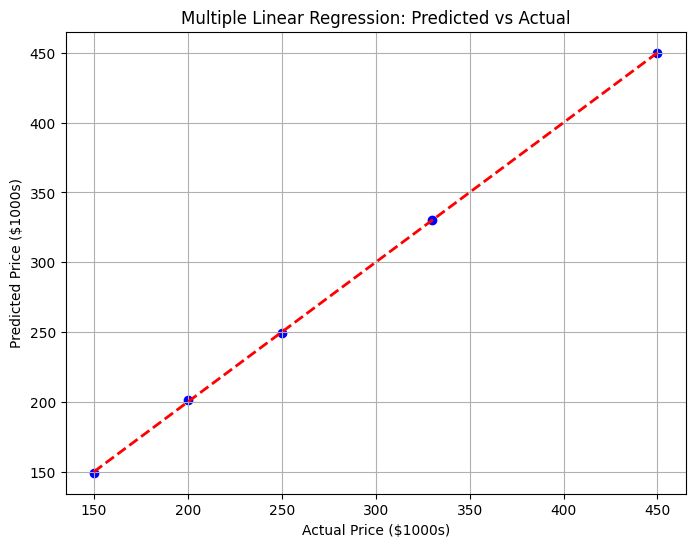

Predicted price for the new house: $299.35k


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define the dataset
# -----------------------------
# Features: [Size, Bedrooms, Age, Distance]
X = np.array([
    [1, 2, 10, 5],
    [2, 3, 15, 4],
    [3, 3, 20, 3],
    [4, 4, 5, 6],
    [5, 5, 8, 2]
])
y = np.array([150, 200, 250, 330, 450])
m = X.shape[0]

# -----------------------------
# Step 2: Feature Scaling (Mean Normalization)
# -----------------------------
mu = np.mean(X, axis=0)
range_ = np.max(X, axis=0) - np.min(X, axis=0)
X_scaled = (X - mu) / range_

# -----------------------------
# Step 3: Initialize parameters
# -----------------------------
n = X_scaled.shape[1]
w = np.zeros(n)
b = 0
alpha = 0.1
iterations = 10001

# -----------------------------
# Step 4: Cost function
# -----------------------------
def compute_cost(X, y, w, b):
    predictions = X.dot(w) + b
    return (1 / (2*m)) * np.sum((predictions - y)**2)

# -----------------------------
# Step 5: Gradient computation
# -----------------------------
def compute_gradient(X, y, w, b):
    predictions = X.dot(w) + b
    error = predictions - y
    dj_dw = (1/m) * X.T.dot(error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw, dj_db

# -----------------------------
# Step 6: Gradient Descent
# -----------------------------
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_scaled, y, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db
    if i % 500 == 0:
        print(f"Iteration {i:4d}: Cost {compute_cost(X_scaled, y, w, b):.2f}")

# -----------------------------
# Step 7: Predictions
# -----------------------------
y_pred = X_scaled.dot(w) + b

# -----------------------------
# Step 8: Plot Predicted vs Actual
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

# -----------------------------
# Step 9: Predict for a new example
# -----------------------------
new_house = np.array([3.5, 3, 12, 4])
new_house_scaled = (new_house - mu) / range_
predicted_price = new_house_scaled.dot(w) + b
print(f"Predicted price for the new house: ${predicted_price:.2f}k")

---